IMPORTING NECCESARY PYTHON LIBRARIES

In [204]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error, r2_score

LOAD THE EXCEL FILE INTO A PANDAS DATAFRAME

In [205]:
# Load the dataset
data = pd.read_excel(r"C:\Users\USER\Documents\Machine Learning Project\PEE\fvf.xlsx")
data.head(10)

,"Temperature, (F)","Temperature, (R)","Solution Gas Oil Ratio, (SCF/STB)","Gas Specific Gravity, (-)","API, (-)","Oil Specific Gravity, (-)","Oil Formation Volume Factor, (bbl/STB)","Bubble Point Pressure, (Psi)"
0,120,580,126.0,1.224,30.029680,0.876,1.102,350.0
1,150,610,160.0,1.265,21.142934,0.927,1.132,560.0
2,220,680,279.0,1.238,25.547725,0.901,1.264,998.0
3,165,625,410.0,1.088,27.488764,0.890,1.268,1332.0
4,130,590,469.0,0.970,34.579812,0.852,1.265,1428.0
5,220,680,381.0,1.126,21.472973,0.925,1.295,1626.0
6,250,710,645.0,1.256,30.770642,0.872,1.518,1804.0
7,120,580,514.0,0.819,29.845496,0.877,1.259,1992.0
8,140,600,437.0,0.847,23.994505,0.910,1.236,2084.0
9,140,600,517.0,0.920,24.165567,0.909,1.269,2164.0


In [206]:
data.describe()

,"Temperature, (F)","Temperature, (R)","Solution Gas Oil Ratio, (SCF/STB)","Gas Specific Gravity, (-)","API, (-)","Oil Specific Gravity, (-)","Oil Formation Volume Factor, (bbl/STB)","Bubble Point Pressure, (Psi)"
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,193.858907,653.858907,636.920353,1.197618,35.103821,0.850419,1.443833,1931.968254
std,51.994983,51.994983,405.758670,0.455350,5.999735,0.030614,0.272769,1261.449227
min,74.000000,534.000000,26.000000,0.159000,19.400000,0.752660,1.032000,79.000000
25%,160.000000,620.000000,347.000000,0.891500,30.934148,0.827970,1.272000,865.000000
50%,196.000000,656.000000,585.000000,1.039000,35.363208,0.848000,1.390200,1758.000000
75%,237.000000,697.000000,853.000000,1.367000,39.400000,0.871122,1.532100,2958.000000
max,306.000000,766.000000,2496.000000,3.444500,56.500000,0.937707,2.916000,6741.000000


SPLIT THE LOADED DATA INTO FEATURES(X) AND TARGET(Y)

In [207]:
X = data[['Temperature, (R)', 'Solution Gas Oil Ratio, (SCF/STB)',
          'Gas Specific Gravity, (-)', 'Oil Specific Gravity, (-)']]
y = data['Oil Formation Volume Factor, (bbl/STB)']

CHECK THE DIMENSION OF THE FEATURE DATA TO ENSURE IT IS 2-D

In [208]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(567, 4)


DEFINE THE STANDING'S CORRELATION FORMULA. RATHER THAN STATING THE NORMAL COEFFICIENTS, REPRESENT IT WITH ALPHABETS, SINCE THESE COEFFICIENTS ARE TO BE OPTIMIZED

In [209]:
def standing_correlation(coef, X):
    a, b, c, d, e = coef
    T = X['Temperature, (R)']  
    Rs = X['Solution Gas Oil Ratio, (SCF/STB)']  
    Yg = X['Gas Specific Gravity, (-)']  
    Yo = X['Oil Specific Gravity, (-)']  
    FVF = a + b * (Rs * (Yg / Yo) ** c + d * (T - 460)) ** e
    return FVF

DEFINE THE OBJECTIVE FUNCTION

In [210]:
# Define the objective function for optimization (mean squared error)
def objective_function(coef, X, y):
    y_pred = standing_correlation(coef, X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse

STATE THE INITIAL COEFFICIENT IN THE STANDING'S CORRELATION

In [211]:
# Initialize coefficients
initial_coef = [0.9759, 0.000120, 0.5, 1.25, 1.2]

In [212]:
# Define the maximum number of iterations
max_iterations = 10000  # Adjust this value as needed

# Define the optimization options
options = {'maxiter': max_iterations}

In [213]:
# Perform optimization
result = minimize(objective_function, initial_coef, args=(X, y), method='BFGS', options = options)


In [214]:
# Print optimized parameters and mean squared error
print("Optimized Parameters:")
print("a (Parameter 1):", result.x[0])
print("b (Parameter 2):", result.x[1])
print("c (Parameter 3):", result.x[2])
print("d (Parameter 4):", result.x[3])
print("e (Parameter 5):", result.x[4])

print("Mean Squared Error (with Standing's correlation): 0.137765899")
print("Mean Squared Error (with optimized parameters):", result.fun)


Optimized Parameters:
a (Parameter 1): 0.8242575045563972
b (Parameter 2): 0.00047338799068836443
c (Parameter 3): 0.687815503003702
d (Parameter 4): 3.1478635693378987
e (Parameter 5): 0.994792575606612
Mean Squared Error (with Standing's correlation): 0.137765899
Mean Squared Error (with optimized parameters): 0.017885261548427456


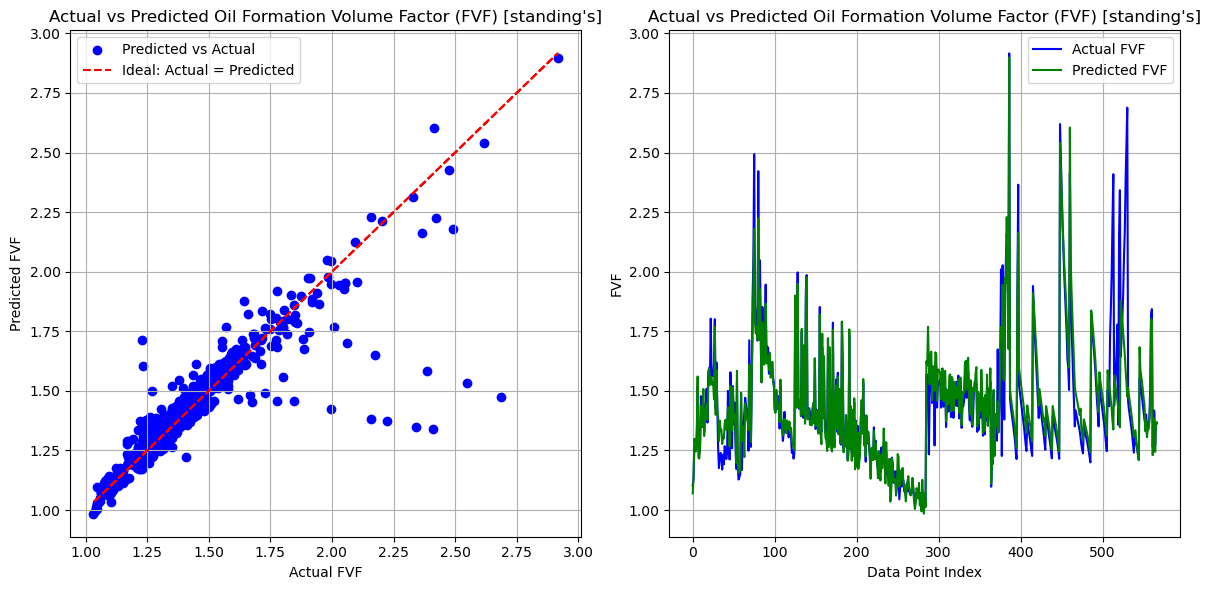

In [217]:
import matplotlib.pyplot as plt

# Calculate predicted FVF values using the optimized parameters
y_pred_optimized = standing_correlation(result.x, X)

# Plot actual vs predicted FVF values
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred_optimized, color='blue', label='Predicted vs Actual')
plt.plot(y, y, color='red', linestyle='--', label='Ideal: Actual = Predicted')
plt.title("Actual vs Predicted Oil Formation Volume Factor (FVF) [standing's]")
plt.xlabel('Actual FVF')
plt.ylabel('Predicted FVF')
plt.legend()
plt.grid(True)

# Line chart
plt.subplot(1, 2, 2)
plt.plot(y, color='blue', label='Actual FVF')
plt.plot(y_pred_optimized, color='green', label='Predicted FVF')
plt.title("Actual vs Predicted Oil Formation Volume Factor (FVF) [standing's]")
plt.xlabel('Data Point Index')
plt.ylabel('FVF')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [218]:
# Define the Glaso correlation equation
def glaso_correlation(coef, X):
    a, b, c, d, e, f = coef
    Rs = X['Solution Gas Oil Ratio, (SCF/STB)']  
    Yg_Yo = X['Gas Specific Gravity, (-)'] / X['Oil Specific Gravity, (-)']  
    T = X['Temperature, (R)']
    B_ob = Rs * (Yg_Yo) ** e + f * (T - 460)
    A = -a + b * np.log(B_ob) - c * (np.log(B_ob)) ** d
    FVF = 1.0 + 10 ** A
    return FVF

In [219]:
# Define the objective function for optimization (mean squared error)
def objective_function(coef, X, y):
    y_pred = glaso_correlation(coef, X)
    mse = mean_squared_error(y, y_pred)
    return mse

In [220]:
# Initialize coefficients
initial_coef = [-6.58511, 2.91329, 0.27683, 2, 0.526, 0.968]

In [221]:
# Define the maximum number of iterations
max_iterations = 1000  # Adjust this value as needed

In [222]:
# Define the optimization options
options = {'maxiter': max_iterations}

In [223]:
# Define the list of optimization methods to try
optimization_methods = ['Nelder-Mead', 'CG', 'BFGS', 'L-BFGS-B', 
                        'TNC', 'COBYLA', 'trust-constr']

In [199]:
# Perform optimization with different methods
for method in optimization_methods:
    print(f"\nOptimizing with {method} method:")
    result = minimize(objective_function, initial_coef, args=(X, y), method=method, options=options)
    print("Optimized Parameters:")
    print("a (Parameter 1):", result.x[0])
    print("b (Parameter 2):", result.x[1])
    print("c (Parameter 3):", result.x[2])
    print("d (Parameter 4):", result.x[3])
    print("e (Parameter 5):", result.x[4])
    print("f (Parameter 6):", result.x[5])
    print("Mean Squared Error:", result.fun)


Optimizing with Nelder-Mead method:
Optimized Parameters:
a (Parameter 1): 5.193127813423491
b (Parameter 2): 1.0943619721473246
c (Parameter 3): 0.40345841273375094
d (Parameter 4): 1.0370393967285034
e (Parameter 5): 0.2415532211042512
f (Parameter 6): 4.288682378669934
Mean Squared Error: 0.019319457416910716

Optimizing with CG method:
Optimized Parameters:
a (Parameter 1): -6.560309506744944
b (Parameter 2): 2.7650266196624567
c (Parameter 3): 1.1706757937650183
d (Parameter 4): 2.445564859552206
e (Parameter 5): 0.5280007909130432
f (Parameter 6): 0.9712488954617083
Mean Squared Error: 0.2712593102998237

Optimizing with BFGS method:
Optimized Parameters:
a (Parameter 1): -6.560309506744944
b (Parameter 2): 2.7650266196624567
c (Parameter 3): 1.1706757937650183
d (Parameter 4): 2.445564859552206
e (Parameter 5): 0.5280007909130432
f (Parameter 6): 0.9712488954617083
Mean Squared Error: 0.2712593102998237

Optimizing with L-BFGS-B method:
Optimized Parameters:
a (Parameter 1): -6

C:\Users\USER\AppData\Local\Temp\ipykernel_7232\375104566.py:4: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(objective_function, initial_coef, args=(X, y), method=method, options=options)


Optimized Parameters:
a (Parameter 1): -6.313221836878927
b (Parameter 2): 2.750745683769439
c (Parameter 3): 0.5183146021389318
d (Parameter 4): 2.3371880499364823
e (Parameter 5): 0.532883176953761
f (Parameter 6): 0.9881074857528758
Mean Squared Error: 0.27125594583304263

Optimizing with COBYLA method:
Optimized Parameters:
a (Parameter 1): -5.704622449812323
b (Parameter 2): 3.2354072357349954
c (Parameter 3): 1.114407789450808
d (Parameter 4): 1.9156697748746787
e (Parameter 5): 0.46365716790789957
f (Parameter 6): 0.8898277913181785
Mean Squared Error: 0.2712541244186979

Optimizing with trust-constr method:
Optimized Parameters:
a (Parameter 1): -6.560555047153309
b (Parameter 2): 2.7664944991423672
c (Parameter 3): 1.161825937241984
d (Parameter 4): 2.4411530966164032
e (Parameter 5): 0.5279809813299624
f (Parameter 6): 0.9712167285500385
Mean Squared Error: 0.2712593102998237


#### Hence, the Glaso's optimization with  Nelder-Mead method is preferred as it has the lowest MSE of  Nelder-Mead method:

In [224]:
result = minimize(objective_function, initial_coef, args=(X, y), method="Nelder-Mead", options=options)
print("Optimized Parameters:")
print("a (Parameter 1):", result.x[0])
print("b (Parameter 2):", result.x[1])
print("c (Parameter 3):", result.x[2])
print("d (Parameter 4):", result.x[3])
print("e (Parameter 5):", result.x[4])
print("f (Parameter 6):", result.x[5])
print("Mean Squared Error:", result.fun)

Optimized Parameters:
a (Parameter 1): 5.193127813423491
b (Parameter 2): 1.0943619721473246
c (Parameter 3): 0.40345841273375094
d (Parameter 4): 1.0370393967285034
e (Parameter 5): 0.2415532211042512
f (Parameter 6): 4.288682378669934
Mean Squared Error: 0.019319457416910716


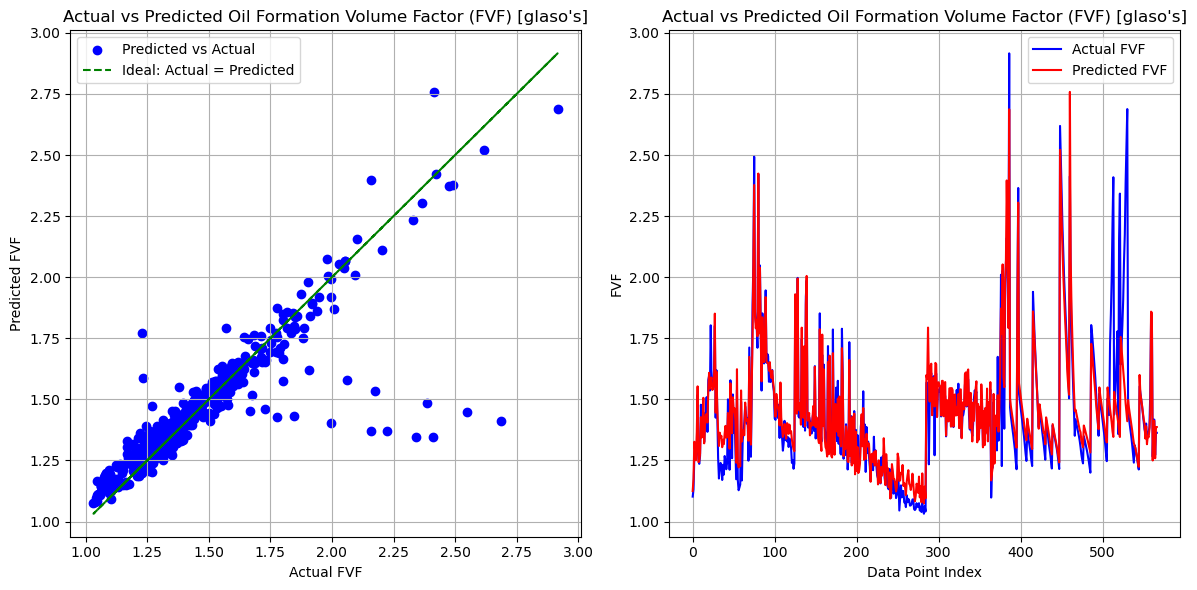

In [225]:
import matplotlib.pyplot as plt

# Calculate predicted FVF values using the optimized parameters
y_pred_optimized2 = glaso_correlation(result.x, X)

# Plot actual vs predicted FVF values
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred_optimized2, color='blue', label='Predicted vs Actual')
plt.plot(y, y, color='green', linestyle='--', label='Ideal: Actual = Predicted')
plt.title("Actual vs Predicted Oil Formation Volume Factor (FVF) [glaso's]")
plt.xlabel('Actual FVF')
plt.ylabel('Predicted FVF')
plt.legend()
plt.grid(True)

# Line chart
plt.subplot(1, 2, 2)
plt.plot(y, color='blue', label='Actual FVF')
plt.plot(y_pred_optimized2, color='red', label='Predicted FVF')
plt.title("Actual vs Predicted Oil Formation Volume Factor (FVF) [glaso's]")
plt.xlabel('Data Point Index')
plt.ylabel('FVF')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()